# Simple Version of ERNIE Bot Web Demo

This tutorial demonstrates how to use the ERNIE models to implement a simple web-based intelligent question-and-answer system with the following features:

- Dialogue: Users can chat with the ERNIE models in multiple rounds.
- File Processing: The demo can generate responses based on the files uploaded by the user.
- Image Processing: The demo can generate responses based on the image uploaded by the user.
- Retrieval-Augmented: The system can access search engines like Baidu Search to obtain information.

## 1. Environmental Setup
Before starting, ensure your system meets these requirements:
- Python version 3.10-3.12 is installed.
- Ensure the following Python libraries are included: `base64`, `openai`, `json`, `textwrap`, `jieba`, `pdfplumber`, `python-docx`, `requests`, `crawl4ai`、`asyncio`、`nest_asyncio`.
    - For the installation steps of `crawl4ai`, please refer to [crawl4ai installation instructions](https://github.com/unclecode/crawl4ai).
- Set the API key for the model `model_api_key`

In [ ]:
model_api_key = "api_key" # the API key for model, which can be disregarded and replaced with any arbitrary value when using the model deployed locally.

### 1.1. Install Dependencies

In [ ]:
!pip install openai jieba pdfplumber python-docx requests asyncio nest_asyncio

# Install crawl4ai
!pip install -U crawl4ai
!pip install crawl4ai --pre
!crawl4ai-setup

## 2. File Processing
File content understanding and file question and answer functions can be implemented based on a text-only model.

When using a text-only model, you need to deploy [the ERNIE-4.5](https://github.com/PaddlePaddle/FastDeploy) series model's services and correctly configure the corresponding service address `ernie_45_url`.

In [ ]:
ernie_45_url = "http://localhost:port/v1"

### 2.1. File parsing
It supports upload and parsing of multiple document formats, and the document content will be used as input context for models to process.

Supported formats include: PDF, DOCX, TXT, MD

In [3]:
import pdfplumber
from docx import Document


def get_file_text(file_path):
    if file_path is None:
        return ""
    if file_path.endswith(".pdf"):
        return read_pdf(file_path)
    elif file_path.endswith(".docx"):
        return read_docx(file_path)
    elif file_path.endswith(".txt") or file_path.endswith(".md"):
        return read_txt_md(file_path)
    else:
        return ""

def read_pdf(pdf_path):
    try:
        text = ""
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading PDF file: {e}")
        return ""

def read_docx(file_path):
    try:
        doc = Document(file_path)
        full_text = []
        for paragraph in doc.paragraphs:
            full_text.append(paragraph.text)
        return "\n".join(full_text)
    except Exception as e:
        print(f"Error reading DOCX file: {e}")
        return ""

def read_txt_md(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        print(f"Error reading TXT or MD file: {e}")
        return ""

test_file = "../data/coffee.txt"
file_text = get_file_text(test_file)
print(file_text[:1000])

咖啡（英语：coffee）是指咖啡植物的种子即咖啡豆在经过烘焙磨粉后通过冲泡制成的饮料，是世界上流行范围最为广泛的饮料之一。咖啡在人类饮食中一般为日常的饮品，人们通常会为了提振精神，或在用餐和社交、阅读时饮用。咖啡原产于非洲东岸的埃塞俄比亚，咖啡起源于15-16世纪，从也门被传播至穆斯林世界，16世纪的威尼斯商人将咖啡引入意大利，随后17-18世纪由于欧洲对咖啡的需求，促使殖民者将咖啡树传播并栽种到美洲、东南亚和印度等热带地区，现今有超过70个国家种植咖啡树。未经烘焙的 咖啡生豆作为世界上最大的出口农产品，以及世界上交易量为广泛的热带农产品之一，也是发展中国家出口中最有价值的商品之一。采收的成熟咖啡果会经过剥离果肉的初步加工，再经过烘焙的工序，而成为能制作咖啡的咖啡豆。透过不同的冲泡方式与成分比例，咖啡有浓缩咖啡、卡布奇诺和拿铁咖啡等变化。咖啡豆的品种可大致分为两种：最为普遍的小果咖啡（阿拉比卡），以及颗粒较粗且酸味较低而苦味较浓的中果咖啡（罗布斯塔）。一些争议指咖啡的种植与它环境影响有关，例如肯亚咖啡豆在移植种植后失去了独有的肯亚酸，而肯亚的原种地土壤含有较高浓度的磷酸。因此，公平贸易咖啡与有机咖啡是一个不断扩大的市场。

传说9世纪的埃塞俄比亚的牧羊人发现并咀嚼了咖啡果实，随后将咖啡果实带给了附近修道院的僧侣，但僧侣起初不愿食用果实，并把果实扔进火里，经过火烤的咖啡果中冒出香气引来僧侣前来查看，僧侣从余烬中捞出咖啡豆，并将其磨碎溶解在热水中，这才制成了世界上第一杯咖啡。但此故事截至1671年并没有得到任何记载，因此可能是杜撰的。亦有研究认为最初栽培的咖啡源自埃塞俄比亚的哈勒尔。埃塞俄比亚的阿克苏姆王国兴盛时曾一度占据也门南部，6世纪中期，萨珊帝国攻占也门后将阿克苏姆赶出南阿拉伯半岛，可以肯定的是咖啡是从埃塞俄比亚传播到也门的。

咖啡传播到穆斯林世界后伊斯兰医学认可了咖啡的好处，认为其可以提振精神并防止酒和大麻对穆斯林的诱惑，15世纪的也门苏菲派修道院在祈祷时使用咖啡来帮助集中注意力。 16世纪初咖啡从也门的摩卡港传播到埃及，随后咖啡馆还出现在叙利亚阿勒颇，并于1554年在奥斯曼帝国首都伊斯坦布尔开业。1511年，由于也门麦加的宗教领袖认为咖啡具有刺激作用，便开始禁止穆斯林饮用咖啡，造成其余阿拉伯世界的苏丹和宗教领袖也相继效仿；其中两位奥斯曼帝国苏丹更是同样出于

### 2.2. Model Input
The input of model is a message list that represents the context history of the conversation. Each message is a dictionary containing the following fields:
- `role`: Represents the role of the message sender, which can be:
    - `user`: User message, indicating user input
    - `assistant`: Model message, indicating the model's reply
- `content`: Specific text content

File processing input has the following characteristics:
- Multiple Rounds of Dialogue: Supporting the preservation of historical dialogue context
- File Processing: Parse the document content and splice it with query

In [15]:
import os

query = "1675 年时，英格兰有多少家咖啡馆？"

file_name = os.path.basename(test_file)
query += f"\n资料:{file_name}\n{file_text}\n"
file_messages = [
    {"role": "user", "content": query}
]
print(file_messages)

[{'role': 'user', 'content': '1675 年时，英格兰有多少家咖啡馆？\n资料:coffee.txt\n咖啡（英语：coffee）是指咖啡植物的种子即咖啡豆在经过烘焙磨粉后通过冲泡制成的饮料，是世界上流行范围最为广泛的饮料之一。咖啡在人类饮食中一般为日常的饮品，人们通常会为了提振精神，或在用餐和社交、阅读时饮用。咖啡原产于非洲东岸的埃塞俄比亚，咖啡起源于15-16世纪，从也门被传播至穆斯林世界，16世纪的威尼斯商人将咖啡引入意大利，随后17-18世纪由于欧洲对咖啡的需求，促使殖民者将咖啡树传播并栽种到美洲、东南亚和印度等热带地区，现今有超过70个国家种植咖啡树。未经烘焙的 咖啡生豆作为世界上最大的出口农产品，以及世界上交易量为广泛的热带农产品之一，也是发展中国家出口中最有价值的商品之一。采收的成熟咖啡果会经过剥离果肉的初步加工，再经过烘焙的工序，而成为能制作咖啡的咖啡豆。透过不同的冲泡方式与成分比例，咖啡有浓缩咖啡、卡布奇诺和拿铁咖啡等变化。咖啡豆的品种可大致分为两种：最为普遍的小果咖啡（阿拉比卡），以及颗粒较粗且酸味较低而苦味较浓的中果咖啡（罗布斯塔）。一些争议指咖啡的种植与它环境影响有关，例如肯亚咖啡豆在移植种植后失去了独有的肯亚酸，而肯亚的原种地土壤含有较高浓度的磷酸。因此，公平贸易咖啡与有机咖啡是一个不断扩大的市场。\n\n传说9世纪的埃塞俄比亚的牧羊人发现并咀嚼了咖啡果实，随后将咖啡果实带给了附近修道院的僧侣，但僧侣起初不愿食用果实，并把果实扔进火里，经过火烤的咖啡果中冒出香气引来僧侣前来查看，僧侣从余烬中捞出咖啡豆，并将其磨碎溶解在热水中，这才制成了世界上第一杯咖啡。但此故事截至1671年并没有得到任何记载，因此可能是杜撰的。亦有研究认为最初栽培的咖啡源自埃塞俄比亚的哈勒尔。埃塞俄比亚的阿克苏姆王国兴盛时曾一度占据也门南部，6世纪中期，萨珊帝国攻占也门后将阿克苏姆赶出南阿拉伯半岛，可以肯定的是咖啡是从埃塞俄比亚传播到也门的。\n\n咖啡传播到穆斯林世界后伊斯兰医学认可了咖啡的好处，认为其可以提振精神并防止酒和大麻对穆斯林的诱惑，15世纪的也门苏菲派修道院在祈祷时使用咖啡来帮助集中注意力。 16世纪初咖啡从也门的摩卡港传播到埃及，随后咖啡馆还出现在叙利亚阿勒颇，并于1554年在奥斯曼帝国首都伊斯坦布尔开业。1511年，由于也门麦

### 2.3. Non-Streaming Request
#### 2.3.1. Request Model
When sending a request to the API, the following main parameters need to be considered:
- `messages` (must): List of conversation messages
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling

In [7]:
from openai import OpenAI

client = OpenAI(base_url=ernie_45_url, api_key=model_api_key)
response = client.chat.completions.create(
    model="default",
    messages=file_messages,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7
)
response = response.model_dump()
print(response)

{'id': 'as-6q6ntqicki', 'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': '根据提供的资料，1675年时，英格兰有3000多家咖啡馆。', 'refusal': None, 'role': 'assistant', 'annotations': None, 'audio': None, 'function_call': None, 'tool_calls': None}, 'flag': 0}], 'created': 1750081699, 'model': 'ernie', 'object': 'chat.completion', 'service_tier': None, 'system_fingerprint': None, 'usage': {'completion_tokens': 19, 'prompt_tokens': 2668, 'total_tokens': 2687, 'completion_tokens_details': None, 'prompt_tokens_details': None}}


#### 2.3.2. Model Output
- `content`: Final answer

In [8]:
content = response["choices"][0]["message"]["content"]
print(content)

根据提供的资料，1675年时，英格兰有3000多家咖啡馆。


### 2.4. Streaming Request
#### 2.4.1. Request Model
When sending a request to the API, the following main parameters need to be considered:
- `messages` (must): List of conversation messages
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling
- `stream` (optional): Whether to return streaming

In [18]:
from openai import OpenAI

client = OpenAI(base_url=ernie_45_url, api_key=model_api_key)
response = client.chat.completions.create(
    model="default",
    messages=file_messages,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7,
    stream=True
)
response_stream = []
for chunk in response:
    if not chunk.choices:
        continue
    response_stream.append(chunk.model_dump())

print(response_stream[:3])

[{'id': 'as-0igrcdhck5', 'choices': [{'delta': {'content': '根据', 'function_call': None, 'refusal': None, 'role': 'assistant', 'tool_calls': None}, 'finish_reason': None, 'index': 0, 'logprobs': None, 'flag': 0}], 'created': 1750081942, 'model': 'ernie', 'object': 'chat.completion.chunk', 'service_tier': None, 'system_fingerprint': None, 'usage': None}, {'id': 'as-0igrcdhck5', 'choices': [{'delta': {'content': '提供的', 'function_call': None, 'refusal': None, 'role': None, 'tool_calls': None}, 'finish_reason': None, 'index': 0, 'logprobs': None, 'flag': 0}], 'created': 1750081942, 'model': 'ernie', 'object': 'chat.completion.chunk', 'service_tier': None, 'system_fingerprint': None, 'usage': None}, {'id': 'as-0igrcdhck5', 'choices': [{'delta': {'content': '资料', 'function_call': None, 'refusal': None, 'role': None, 'tool_calls': None}, 'finish_reason': None, 'index': 0, 'logprobs': None, 'flag': 0}], 'created': 1750081942, 'model': 'ernie', 'object': 'chat.completion.chunk', 'service_tier': 

#### 2.4.2. Model Output
The model's output will be delivered via streaming return.
- `content`: Final answer

In [21]:
content_text_stream = ""
for res in response_stream:
    content_text_stream += res["choices"][0]["delta"]["content"]
print(content_text_stream)

根据提供的资料，1675年时，英格兰有3000多家咖啡馆。


## 3. Image Processing
Features requiring visual semantic understanding, such as image description and image-text question answering, can be implemented using multimodal models.

When using multimodal models, you need to deploy the [ERNIE-4.5-VL](https://github.com/PaddlePaddle/FastDeploy) series model's services and correctly configure the corresponding service address `ernie_45_vl_url`.

In [ ]:
ernie_45_vl_url = "http://localhost:port/v1"

### 3.1. Image Parsing
- Supported document formats: PDF, DOCX, TXT, MD
- When uploading local pictures, you need to use the `base64` library to convert the image file into a Base64 encoded string and splice it into a standard format of `data:image/{type};base64,{Base64 encoded string}`.

In [ ]:
import base64


def get_image_url(image_path):
    base64_image = ""
    extension = image_path.split(".")[-1]
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    url = f"data:image/{extension};base64,{base64_image}"
    return url

test_image = "../assets/yiyan_logo.png"
image_url = get_image_url(test_image)

### 3.2. Model Input
The input has the following characteristics:
- Multiple Rounds of Dialogue: Supporting the preservation of historical dialogue context
- Mixed Input: Supports sending pictures and text content at the same time
- Image Support: You can upload pictures through URL or local files

In [5]:
# url pictures
multi_messages_url = [
    {"role": "user", "content": [
        {"type": "image_url", "image_url": {"url": "https://nlp-eb.cdn.bcebos.com/static/eb/asset/topLogo.4a0fc7b7"}},
        {"type": "text", "text": "请分析这张图"}
    ]}
]

[{'role': 'system', 'content': '你是一个图片分析助手'}, {'role': 'user', 'content': [{'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'text', 'text': '请分析这张图'}]}]

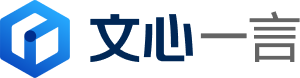

In [10]:
# Local pictures
multi_messages_local = [
    {"role": "user", "content": [
        {"type": "image_url", "image_url": {"url": image_url}},
        {"type": "text", "text": "请分析这张图"}
    ]}
]
print(multi_messages_local)

### 3.3. Request Model
When sending a request to the API, the following main parameters need to be considered:
- `messages` (must): a list of image and text dialogue messages. The pictures can be uploaded locally (`multi_messages_local`), or you can enter the URL address (`multi_messages_url`)
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling

In [15]:
from openai import OpenAI

client = OpenAI(base_url=ernie_45_vl_url, api_key=model_api_key)
response = client.chat.completions.create(
    model="default",
    messages=multi_messages_local,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7
)
response = response.model_dump()
print(response)

{'id': 'chatcmpl-40681438-6bf8-4af9-b51d-1978ce39e8d8', 'object': 'chat.completion', 'created': 1749006988, 'model': 'default', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': '这张图是“文心一言”的logo。整体来看，该logo采用简洁现代的设计风格。\n### 图形部分\n- 左侧图形由几何形状构成，类似六边形与内部线条的组合，线条可能象征数据流动或智能交互，六边形在科技感设计中较为常见，暗示产品的科技属性。\n### 文字部分\n- 右侧“文心一言”采用无衬线字体，笔画粗细一致，简洁明了，符合现代审美。“文心”二字可能寓意文化内涵与核心智能，“一言”则突出语言交流与输出的特性。\n### 色彩方面\n- 蓝色通常代表科技、专业、可靠，选择蓝色为主色调，传达出产品具备专业的人工智能技术和可靠的服务品质。</s></s>', 'reasoning_content': None}, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 54, 'total_tokens': 212, 'completion_tokens': 158, 'prompt_tokens_details': None}}


### 3.4. Model Output
- `content`: Final answer

In [16]:
content = response["choices"][0]["message"]["content"]
print(content)

这张图是“文心一言”的logo。整体来看，该logo采用简洁现代的设计风格。
### 图形部分
- 左侧图形由几何形状构成，类似六边形与内部线条的组合，线条可能象征数据流动或智能交互，六边形在科技感设计中较为常见，暗示产品的科技属性。
### 文字部分
- 右侧“文心一言”采用无衬线字体，笔画粗细一致，简洁明了，符合现代审美。“文心”二字可能寓意文化内涵与核心智能，“一言”则突出语言交流与输出的特性。
### 色彩方面
- 蓝色通常代表科技、专业、可靠，选择蓝色为主色调，传达出产品具备专业的人工智能技术和可靠的服务品质。</s></s>


## 4. Retrieval-Augmented Generation
- Retrieval enhancements can be implemented based on a text-only model. When using a text-only model, you need to deploy the [ERNIE-4.5](https://github.com/PaddlePaddle/FastDeploy) series model services and correctly configure the corresponding service address `ernie_45_url`.
- The Retrieval-Augmented Generation needs to be completed with the help of AI search tools, so the API key `qianfan_api_key` needs to be set.You can log in to [Qianfan](https://console.bce.baidu.com/iam/#/iam/apikey/list) to create your API key.API keys are sensitive information and should be kept properly.

In [ ]:
# Model service address configuration
ernie_45_url = "http://localhost:port/v1"

# AI Search Tool Configuration
qianfan_api_key = "bce-v3/xxx"  # Replace with your real API key
web_search_service_url = "https://qianfan.baidubce.com/v2/ai_search/chat/completions"  # AI Search Tool URL

### 4.1. Main Search Structure Overview

- **Step 1: Search Query Rewriting**
    
    First, analyze whether the user's query needs obtain the latest information from the internet. When searching, rewrite the user's query to get the queries that be searched.

- **Step 2: Get the Full Search Results**

    crawl the complete web page content from the `URL` in the search results based on AI search tools.

- **Step 3: Generate the final answer**

    Organize the search results and call the model's interface to generate answers.

### 4.2. Search Query Rewriting
This step requires the model to determine whetherthe user's query needs obtain the latest information from the internet, and rewrite the user's query to get the queries that be searched.

A prompt is required to guide the model to complete the task and return the standardized JSON format results.

In [1]:
import textwrap
from datetime import datetime

SEARCH_INFO_PROMPT = textwrap.dedent(
    """\
    ## 当前时间
    {date}

    ## 对话
    {context}
    问题：{query}

    根据当前时间和对话完成以下任务：
    1. 查询判断：是否需要借助搜索引擎查询外部知识回答用户当前问题。
    2. 问题改写：改写用户当前问题，使其更适合在搜索引擎查询到相关知识。
    注意：只在**确有必要**的情况下改写，输出不超过 5 个改写结果，不要为了凑满数量而输出冗余问题。

    ## 输出如下格式的内容（只输出 JSON ，不要给出多余内容）：
    ```json
    {{
        "is_search":true/false,
        "query_list":["改写问题1"，"改写问题2"...]
    }}```
    """
)
history = "user:\n你好\nassistant:\n你好，我是你的智能搜索助手，请问有什么我可以帮助你的？\n"
query = "上海有什么美食"
search_content = SEARCH_INFO_PROMPT.format(
    date=datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    context=history,
    query=query
)
print(search_content)

## 当前时间
2025-06-25 14:52:47

## 对话
user:
你好
assistant:
你好，我是你的智能搜索助手，请问有什么我可以帮助你的？

问题：上海有什么美食

根据当前时间和对话完成以下任务：
1. 查询判断：是否需要借助搜索引擎查询外部知识回答用户当前问题。
2. 问题改写：改写用户当前问题，使其更适合在搜索引擎查询到相关知识。
注意：只在**确有必要**的情况下改写，输出不超过 5 个改写结果，不要为了凑满数量而输出冗余问题。

## 输出如下格式的内容（只输出 JSON ，不要给出多余内容）：
```json
{
    "is_search":true/false,
    "query_list":["改写问题1"，"改写问题2"...]
}```



Call the model interface for judgment.

In [ ]:
from openai import OpenAI

judge_search_messages = [{"role": "user", "content": search_content}]

client = OpenAI(base_url=ernie_45_url, api_key=model_api_key)
response = client.chat.completions.create(
    model="default",
    messages=judge_search_messages
)

response = response.model_dump()
print(response)

{'id': 'chatcmpl-af6a1428-1dc0-41f4-860a-9786b741005f', 'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': '```json\n{\n    "is_search": true,\n    "query_list": ["上海美食推荐", "上海特色美食", "上海必吃美食", "上海美食排行榜"]\n}\n```</s></s>', 'refusal': None, 'role': 'assistant', 'annotations': None, 'audio': None, 'function_call': None, 'tool_calls': None, 'reasoning_content': None}}], 'created': 1750768029, 'model': 'default', 'object': 'chat.completion', 'service_tier': None, 'system_fingerprint': None, 'usage': {'completion_tokens': 46, 'prompt_tokens': 201, 'total_tokens': 247, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}}


parse the model's results to json format.
- `is_search`: Whether to search online.
- `query_list`: List of queries that can be searched.

In [ ]:
import json
import re

search_query = response["choices"][0]["message"]["content"]
json_match = re.search(r'```json\n(.*?)\n```', search_query, re.DOTALL)
json_str = json_match.group(1)
search_query = json.loads(json_str)

print(search_query)

{'is_search': True, 'query_list': ['上海美食推荐', '上海特色美食', '上海必吃美食', '上海美食排行榜']}


### 4.3. Get the Full Search Results

#### 4.3.1. AI Search

If previous results show the query is needed to be searched online, use the AI ​​search tool to obtain the search results.

AI search tool request parameters:
- `messages`: Search for input
    - `role`: The role of the message sender, which can be a `user` user message, indicating the user's input; or an `assistant` model message, which can represent the model's reply
    - `content`: The content text of the message
- `resource_type_filter`: search result filtering
    - `type`: Search type. In this example, only the setting of web search modals is supported.
    - `top_k`: Maximum number of the result

For more request parameters in AI search, please refer to [Baidu AI Search](https://cloud.baidu.com/doc/AppBuilder/s/zm8pn5cju)

In [ ]:
import requests

max_search_results_num = 15
if search_query.get("is_search", False) and search_query.get("query_list", []):
    headers = {
        "Authorization": "Bearer " + qianfan_api_key,
        "Content-Type": "application/json"
    }

    search_result = []
    top_k = max_search_results_num // len(search_query["query_list"])
    for query in search_query["query_list"]:
        payload = {
            "messages": [{"role": "user", "content": query}],
            "resource_type_filter": [{"type": "web", "top_k": top_k}]
        }
        response = requests.post(web_search_service_url, headers=headers, json=payload)
        response = response.json()

        search_result.append(response["references"])
    print(search_result[0])

[{'content': ' 晚上7点一开市,设在露天广场上的夜集市迎来当天的首批食客。徐州烧烤、淄博烧烤、阜阳卷馍、东北大饭包、青岛酱蘸鲍鱼、江西炒粉……随着一个个摊位忙碌起来,各种美食的香气随之在空气中弥漫,引得食客胃口大开。 “这是东北大饭包,你看,白菜叶子里面包了好多料,土豆泥啊什么的,想加什么给你加,好大一只。” “之前就在路边摆摊,一天到晚提心吊胆的,我有5个顾客群,大概2000人左右,我每天出摊的时候就发定位告诉大家,我今天会在哪条路边摆,不时换地方,今天不知道明天咋样……这感觉不好受。现在好了。” 经前期调研发现,在罗店自发形成的占道经营摊点日均达100余处。像陶晓哲这样的流动餐饮摊贩带来的噪声、垃圾、油烟等各种扰民问题,是罗店镇城运中心最常接到的市民投诉。 流动摊贩集中规范运营便民点应运而生。', 'date': '2025-06-21 21:16:06', 'icon': None, 'id': 1, 'image': None, 'title': '开市仅一个多月,北上海这个美食夜集市怎么就火了……', 'type': 'web', 'url': 'https://www.jfdaily.com/sgh/detail?id=1597987', 'video': None, 'web_anchor': '开市仅一个多月,北上海这个美食夜集市怎么就火了……'}, {'content': ' 摩洛哥风情海鲜总汇塔吉锅 20元可以升级 红鱼柳 黑虎虾 鱿鱼 鲍鱼 连蛤蜊都饱满鲜嫩 酱汁酸辣带点奶香 法棍蘸着吃直接嗦手指 满满一锅海鲜的快乐太过瘾了 辣芝士雪峰牛排牛骨髓 太会了 五分熟牛排一刀切爆汁 牛骨髓挖出来胶质感裹着肉香搭配着牛排 再蘸点旁边的辣酱和土豆泥 口感层次丰富 加量不加价 以前套餐里半只的墨西哥风味烤鸡现在直接上整只 鸡皮烤得焦香滴油 鸡胸肉都不带柴的 配的香脆薯角 一口鸡一口薯 快乐double 仙人掌盆栽蛋糕 很萌 奶冻打底 巧克力碎 小饼干 挖一勺入口 冰凉细腻带点可可香 吃完连花盆都想舔干净 这套餐量也太实诚了 我们俩人撑到实在吃不下只能打包 在世纪大道这地段 性价比直接杀疯了 AMINO AMIGO 世纪汇店 世纪大道1192号世纪汇广场LG1层020 世纪大道地铁8号口出口 户外广场', 'date': '2025-06-11

The results returned by the search mainly include:
- `content`: Web page summary
- `title`: web page title
- `url`: Web page URL

For more response parameters descriptions, please refer to [Baidu AI Search](https://cloud.baidu.com/doc/AppBuilder/s/zm8pn5cju)

#### 4.3.2. Crawl the Complete Web Page Content

Since `content` only contains part of the web page content, you need to crawl the text in the URL to obtain the complete search results.

Use the `crawl4ai` tool to crawl the web page text data and replace the original `content`

In [ ]:
import asyncio
import re

import nest_asyncio
from crawl4ai import AsyncWebCrawler, CacheMode, CrawlerRunConfig, DefaultMarkdownGenerator, PruningContentFilter


async def get_webpage_text(url):
    content_filter = PruningContentFilter(
        threshold=0.48,
        threshold_type="fixed",
        min_word_threshold=0
    )
    # Config makedown generator
    md_generator = DefaultMarkdownGenerator(
        content_filter=content_filter
    )
    run_config = CrawlerRunConfig(
        # 20 seconds page timeout
        page_timeout=20000,

        # Filtering
        word_count_threshold=10,
        excluded_tags=["nav", "footer", "aside", "header", "script", "style", "iframe", "meta"],
        exclude_external_links=True,
        exclude_internal_links=True,
        exclude_social_media_links=True,
        exclude_external_images=True,
        only_text=True,

        # Markdown generation
        markdown_generator=md_generator,

        # Cache
        cache_mode=CacheMode.BYPASS
    )
    try:
        async with AsyncWebCrawler() as crawler:
            result = await crawler.arun(
                url=url,
                config=run_config
            )

        webpage_text = result.markdown.fit_markdown

        # Clean up the text
        cleaned_text = webpage_text.replace("undefined", "")
        cleaned_text = re.sub(r'(\n\s*){3,}', '\n\n', cleaned_text)
        cleaned_text = re.sub(r'[\r\t]', '', cleaned_text)
        cleaned_text = re.sub(r' +', ' ', cleaned_text)
        cleaned_text = re.sub(r'^\s+|\s+$', '', cleaned_text, flags=re.MULTILINE)
        return cleaned_text.strip()

    except Exception as e:
        print(f"Error: {e}")
        return None

nest_asyncio.apply()
loop = asyncio.get_event_loop()

web_url = "https://baike.baidu.com/item/上海菜/672867"
web_page_text = loop.run_until_complete(get_webpage_text(web_url))
print(web_page_text[: 2000] + "...")

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://baike.baidu.com/item/上海菜/672867                                                            
| ✓ | ⏱: 1.31s 

[SCRAPE].. ◆ https://baike.baidu.com/item/上海菜/672867                                                            
| ✓ | ⏱: 0.15s 

[COMPLETE] ● https://baike.baidu.com/item/上海菜/672867                                                            
| ✓ | ⏱: 1.47s 

进入词条全站搜索
进入词条全站搜索
播报编辑收藏赞
登录
# 上海菜
播报编辑上传视频
江南地区传统饮食文化的一种流派
许魏洲邀你吃“不要太灵的”上海本帮菜
03:35
上海传统美食大合集!生煎小笼本帮菜,根本吃不够!
17:59
吃了30多年红烧肉，只服这种特色做法，色泽红亮肥而不腻，真过瘾
10:08
上海菜十大名菜有哪些：让你领略上海独特美味！
01:49
去北京开的上海老饭店吃本帮菜，这几个菜就花了500多，烤菜吃不惯
03:41
外国丈母娘第一次来中国吃上海本帮菜，被震撼到，中国菜这么好吃
08:58
上海外滩吃顿本帮菜，不知道正宗不
00:18
老洋房里快40年的上海菜，很低调，要不是排队谁会以为是饭店
02:07
开在古镇里面的本帮菜老店
01:55
老弄堂里30多年上海菜，老板“大半个香港娱乐圈都来过”
01:46
上海弄堂里的本帮菜馆，店不大生意爆棚，没开门就得排队
05:38
这才是上海本帮菜的水平，红烧划水太惊艳，小店6张桌座无虚席
04:20
收藏
查看
585有用+1
102
沪菜，即上海菜，是其常用的烹调方法以红烧、煨、糖为主，以浓油赤酱、咸淡适中、保持原味、醇厚鲜美为其特色。 [4]
上海菜的别称为本帮菜，是江南地区传统饮食文化的一个重要流派。 自1843年上海开埠以来，随着工商业的发展，四方商贾云集，饭店酒楼应运而生。到20世纪三四十年代，有京、广、苏、扬、锡、甬、杭、闽、川、徽、潮、湘、以及上海本地菜等十六个帮别，同时还有素菜、清真菜，各式西菜、西点。 此时，上海菜原以红烧、生煸见长，后来吸取无锡、苏州、宁波等地方菜的特点，为适应上海人喜食清淡爽口的口味，菜肴渐由原来的重油赤酱趋向淡雅爽口，同时，兼及西菜、西点之法，使花色品种有了很大的发展，拥有鱼下巴甩水、腌川红烧圈子、白斩鸡、松江鲈鱼等名菜。 [4]
2014年，上海本帮菜肴传统烹饪技艺被列入国家级非物质文化遗产代表性项目名录。 [5]2018年9月，八宝鸭被评为“中国菜”之上海十大经典名菜。 [6]
## 相关星图
常见的中国菜系
共36个词条23.3万阅读中文名
上海菜别 名
沪菜、本帮菜 [4]产 地
上海 [4]名 菜
鱼下巴甩水、腌川红烧圈子、白斩鸡、松江鲈鱼 [4]烹调方法
以红烧、煨、糖为主 [4]特 点
浓油赤酱、咸淡适中、保持原味、醇厚鲜美 [4]概 念
食品，

Integrate complete search results. To avoid too long search results, you need to limit the length of search content characters by `max_search_results_char`.

In [ ]:
import jieba


def cut_chinese_english(text):
    words = jieba.lcut(text)
    en_ch_words = []

    for word in words:
        if word.isalpha() and not any("\u4e00" <= char <= "\u9fff" for char in word):
            en_ch_words.append(word)
        else:
            en_ch_words.extend(list(word))
    return en_ch_words

async def get_complete_search_content(search_results: list, max_search_results_char: int=18000) -> str:
    results = []
    for search_res in search_results:
        for item in search_res:
            new_content = await get_webpage_text(item["url"])
            if not new_content:
                continue
            item_text = "Title: {title} \nURL: {url} \nContent:\n{content}\n".format(title=item["title"], url=item["url"], content=new_content)

            # Truncate the search result to max_search_results_char characters
            search_res_words = cut_chinese_english(item_text)
            res_words = cut_chinese_english("".join(results))
            if len(search_res_words) + len(res_words) > max_search_results_char:
                break

            results.append(f"参考资料[{len(results) + 1}]:\n{item_text}\n")

    return "".join(results)

complete_search_result = loop.run_until_complete(get_complete_search_content(search_result))

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://www.jfdaily.com/sgh/detail?id=1597987                                                        |
✓ | ⏱: 1.13s 

[SCRAPE].. ◆ https://www.jfdaily.com/sgh/detail?id=1597987                                                        |
✓ | ⏱: 0.04s 

[COMPLETE] ● https://www.jfdaily.com/sgh/detail?id=1597987                                                        |
✓ | ⏱: 1.18s 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/gk/66ypgljn2gg7971dkhnm1q5w0000gn/T/jieba.cache
Loading model cost 0.333 seconds.
Prefix dict has been built successfully.


[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://m.ctrip.com/webapp/you/tripshoot/paipai/...&twojumpwakeup=0&allianceId=1049189&sid=19855591  |
✓ | ⏱: 1.07s 

[SCRAPE].. ◆ https://m.ctrip.com/webapp/you/tripshoot/paipai/...&twojumpwakeup=0&allianceId=1049189&sid=19855591  |
✓ | ⏱: 0.00s 

[COMPLETE] ● https://m.ctrip.com/webapp/you/tripshoot/paipai/...&twojumpwakeup=0&allianceId=1049189&sid=19855591  |
✓ | ⏱: 1.08s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://gs.ctrip.com/html5/you/foods/2016305/list-c5000.html                                         |
✓ | ⏱: 1.50s 

[SCRAPE].. ◆ https://gs.ctrip.com/html5/you/foods/2016305/list-c5000.html                                         |
✓ | ⏱: 0.02s 

[COMPLETE] ● https://gs.ctrip.com/html5/you/foods/2016305/list-c5000.html                                         |
✓ | ⏱: 1.52s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://m.thepaper.cn/newsDetail_forward_31025474                                                    |
✓ | ⏱: 0.91s 

[SCRAPE].. ◆ https://m.thepaper.cn/newsDetail_forward_31025474                                                    |
✓ | ⏱: 0.01s 

[COMPLETE] ● https://m.thepaper.cn/newsDetail_forward_31025474                                                    |
✓ | ⏱: 0.93s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://baike.baidu.com/item/上海菜/672867                                                            
| ✓ | ⏱: 1.27s 

[SCRAPE].. ◆ https://baike.baidu.com/item/上海菜/672867                                                            
| ✓ | ⏱: 0.09s 

[COMPLETE] ● https://baike.baidu.com/item/上海菜/672867                                                            
| ✓ | ⏱: 1.36s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://baijiahao.baidu.com/s?id=1828711351827613727&wfr=spider&for=pc                               |
✓ | ⏱: 0.89s 

[SCRAPE].. ◆ https://baijiahao.baidu.com/s?id=1828711351827613727&wfr=spider&for=pc                               |
✓ | ⏱: 0.03s 

[COMPLETE] ● https://baijiahao.baidu.com/s?id=1828711351827613727&wfr=spider&for=pc                               |
✓ | ⏱: 0.92s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://baijiahao.baidu.com/s?id=1834297223163493130&wfr=spider&for=pc                               |
✓ | ⏱: 1.07s 

[SCRAPE].. ◆ https://baijiahao.baidu.com/s?id=1834297223163493130&wfr=spider&for=pc                               |
✓ | ⏱: 0.03s 

[COMPLETE] ● https://baijiahao.baidu.com/s?id=1834297223163493130&wfr=spider&for=pc                               |
✓ | ⏱: 1.11s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://baijiahao.baidu.com/s?id=1835639030190648447&wfr=spider&for=pc                               |
✓ | ⏱: 1.04s 

[SCRAPE].. ◆ https://baijiahao.baidu.com/s?id=1835639030190648447&wfr=spider&for=pc                               |
✓ | ⏱: 0.03s 

[COMPLETE] ● https://baijiahao.baidu.com/s?id=1835639030190648447&wfr=spider&for=pc                               |
✓ | ⏱: 1.08s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://new.qq.com/rain/a/20250620A04RMZ00                                                           |
✓ | ⏱: 1.19s 

[SCRAPE].. ◆ https://new.qq.com/rain/a/20250620A04RMZ00                                                           |
✓ | ⏱: 0.02s 

[COMPLETE] ● https://new.qq.com/rain/a/20250620A04RMZ00                                                           |
✓ | ⏱: 1.21s 

[INIT].... → Crawl4AI 0.6.3 

[FETCH]... ↓ https://baijiahao.baidu.com/s?id=1828709688765599122&wfr=spider&for=pc                               |
✓ | ⏱: 1.06s 

[SCRAPE].. ◆ https://baijiahao.baidu.com/s?id=1828709688765599122&wfr=spider&for=pc                               |
✓ | ⏱: 0.03s 

[COMPLETE] ● https://baijiahao.baidu.com/s?id=1828709688765599122&wfr=spider&for=pc                               |
✓ | ⏱: 1.10s 

### 4.3. Generate Final Answer
#### 4.3.1. Model Input
the input has the following characteristics:
- Network Search: splice the complete search results to `ANSWER_PROMPT` and provide it to the model as a context.
- Multiple Rounds of Dialogue: Supporting the preservation of historical dialogue context

In [ ]:
ANSWER_PROMPT = textwrap.dedent(
    """\
    下面你会收到多段参考资料和一个问题。你的任务是阅读参考资料，并根据参考资料中的信息回答对话中的问题。
    以下是当前时间和参考资料：
    ---------
    ## 当前时间
    {date}

    ## 参考资料
    {search_result}

    请严格遵守以下规则：
    1. 回答必须结合问题需求和当前时间，对参考资料的可用性进行判断，避免在回答中使用错误或过时的信息。
    2. 当参考资料中的信息无法准确地回答问题时，你需要在回答中提供获取相应信息的建议，或承认无法提供相应信息。
    3. 你需要优先根据百度高权威信息、百科、官网、权威机构、专业网站等高权威性来源的信息来回答问题，
       但务必不要用“（来源：xx）”这类格式给出来源，
       不要暴露来源网站中的“_百度高权威信息”，
       也不要出现'根据参考资料'，'根据当前时间'等表述。
    4. 更多地使用参考文章中的相关数字、案例、法律条文、公式等信息，让你的答案更专业。
    5. 只要使用了参考资料中的任何内容，必须在句末或段末加上资料编号，如 "[1]" 或 "[2][4]"。不要遗漏编号，也不要随意编造编号。编号必须来源于参考资料中已有的标注。
    ---------
    下面请结合以上信息，回答问题，补全对话:
    ## 对话
    {context}
    问题：{query}

    直接输出回复内容即可。
    """
)

query = ANSWER_PROMPT.format(
    date=datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    search_result=complete_search_result,
    context=history,
    query=query
)
web_search_messages = [{"role": "user", "content": query}]
print(web_search_messages)

[{'role': 'user', 'content': '下面你会收到多段参考资料和一个问题。你的任务是阅读参考资料，并根据参考资料中的信息回答对话中的问题。\n以下是当前时间和参考资料：\n---------\n## 当前时间\n2025-06-24 19:31:40\n\n## 参考资料\n参考资料[1]:\nTitle: 开市仅一个多月,北上海这个美食夜集市怎么就火了…… \nURL: https://www.jfdaily.com/sgh/detail?id=1597987 \nContent:\n用户名：\n---\n密 码：\n验证码： | 看不清\n2025-06-24星期二\n模糊搜索 作者搜索 标题搜索 正文搜索 摘要搜索\n我的位置： > > 文章详情\n# 开市仅一个多月，北上海这个美食夜集市怎么就火了……\n转自：上海宝山 2025-06-21 21:16:06\n位于宝山区罗店镇7号线罗南新村地铁站外的\n流动摊贩集中规范运营（临时）便民点\n最近在社交平台上火了起来\n一百多个摊位\n汇聚了全国各地的特色小吃\n成了人们体验城市烟火气的一处网红夜集市\n点燃城市烟火气的同时\n如何让城市管理文明有序\n罗店镇的这一探索\n试图寻找治理的新路径\nPART.1\n晚上7点一开市，设在露天广场上的夜集市迎来当天的首批食客。徐州烧烤、淄博烧烤、阜阳卷馍、东北大饭包、青岛酱蘸鲍鱼、江西炒粉……随着一个个摊位忙碌起来，各种美食的香气随之在空气中弥漫，引得食客胃口大开。\n“这种烟火气还能找得到，挺好的，以前我们俩都是晚上开车去昆山去吃夜宵。”\n“我正好地铁从市里下班回来，就顺便过来吃点东西，这里想吃什么都有，而且有统一管理，蛮规范的，吃起来也放心吧。”\n“这是东北大饭包，你看，白菜叶子里面包了好多料，土豆泥啊什么的，想加什么给你加，好大一只。”\n自5月初运营以来，夜集市备受周边居民和食客的青睐，晚上7点到次日凌晨2点运营期间，每天平均迎来食客一千多人次，节假日高峰时甚至可达四五千人次。吉林小串的摊主陶晓哲忙个不停。\n“这里人流量大，而且不用提心吊胆，营业额也挺可观的，原来的话一天营业额在3000~5000元，现在好的时候就1万多。”\n两年前，为了陪在上海工作的女儿，快50岁的陶晓哲和老公来到罗店，开始摆起了烧烤摊。在老家有过10多年开烧

#### 4.3.2. Request Model
When sending a request to the API, the following main parameters need to be considered:
- `messages` (must): List of conversation messages
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling

In [ ]:
client = OpenAI(base_url=ernie_45_url, api_key=model_api_key)
response = client.chat.completions.create(
    model="default",
    messages=web_search_messages,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7
)
response = response.model_dump()
print(response)

{'id': 'chatcmpl-ebe32a15-d82a-4153-8a36-888b36f440eb', 'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': '上海作为国际大都市，美食种类繁多，融合了本帮菜的浓油赤酱、江南风味的精致以及各地乃至全球的风味。以下是一份详尽的上海美食攻略：\n\n### 一、经典本帮菜\n\n1. **小笼包（南翔小笼）**\n\n   * 特色：皮薄馅大，汤汁饱满，以城隍庙的南翔馒头店最负盛名。\n   * 吃法：先咬破皮吸汤汁，再蘸姜丝醋食用。[6][7]\n\n2. **生煎馒头（生煎包）**\n\n   * 推荐：大壶春（全发酵面皮，酥脆底）和小杨生煎（汤汁多）。\n   * 灵魂：焦脆的底部搭配鲜肉或虾仁馅，趁热吃最佳。[6][7]\n\n3. **葱油拌面**\n\n   * 精髓：熬香的葱油+酱油糖汁，简单却滋味浓郁。\n   * 推荐：老字号“老地方面馆”或街头小店。[6][7]\n\n4. **红烧肉（本帮特色）**\n\n   * 经典做法：浓油赤酱，肥而不腻，常配卤蛋或百叶结。\n   * 推荐：“老吉士酒家”。[6][7]\n\n5. **粢饭团**\n\n   * 市井早餐：糯米包裹油条、肉松、榨菜，咸甜皆宜。\n   * 推荐：南阳路粢饭团。 [6][7]\n\n6. **白斩鸡（小绍兴鸡粥）**\n\n   * 特色：皮黄肉嫩，蘸特制酱油，配鸡粥更地道。\n   * 推荐：“小绍兴”。[6][7]\n\n7. **油爆虾**\n\n   * 特色：本帮甜口，虾壳酥脆，酱汁甜中带咸。\n   * 推荐：“上海老饭店”。[6][7]\n\n### 二、特色小吃与夜市\n\n1. **鲜肉月饼**\n\n   * 季节限定：中秋前后最火，酥皮包裹鲜肉馅。\n   * 推荐：光明邨大酒家。[6][7]\n\n2. **糟货（糟钵头）**\n\n   * 夏日风味：用酒糟卤制的毛豆、门腔（猪舌）、虾等，清凉爽口。\n   * 推荐：老字号“老人和”。[6][7]\n\n3. **咸豆浆+大饼油条**\n\n   * 老上海早餐：咸豆浆加紫菜、虾皮、油条，搭配酥脆大饼，体验本地烟火气。

#### 4.3.3. Model Output
- `content`: Final answer

In [ ]:
content = response["choices"][0]["message"]["content"]
print(content)

上海作为国际大都市，美食种类繁多，融合了本帮菜的浓油赤酱、江南风味的精致以及各地乃至全球的风味。以下是一份详尽的上海美食攻略：

### 一、经典本帮菜

1. **小笼包（南翔小笼）**

   * 特色：皮薄馅大，汤汁饱满，以城隍庙的南翔馒头店最负盛名。
   * 吃法：先咬破皮吸汤汁，再蘸姜丝醋食用。[6][7]

2. **生煎馒头（生煎包）**

   * 推荐：大壶春（全发酵面皮，酥脆底）和小杨生煎（汤汁多）。
   * 灵魂：焦脆的底部搭配鲜肉或虾仁馅，趁热吃最佳。[6][7]

3. **葱油拌面**

   * 精髓：熬香的葱油+酱油糖汁，简单却滋味浓郁。
   * 推荐：老字号“老地方面馆”或街头小店。[6][7]

4. **红烧肉（本帮特色）**

   * 经典做法：浓油赤酱，肥而不腻，常配卤蛋或百叶结。
   * 推荐：“老吉士酒家”。[6][7]

5. **粢饭团**

   * 市井早餐：糯米包裹油条、肉松、榨菜，咸甜皆宜。
   * 推荐：南阳路粢饭团。 [6][7]

6. **白斩鸡（小绍兴鸡粥）**

   * 特色：皮黄肉嫩，蘸特制酱油，配鸡粥更地道。
   * 推荐：“小绍兴”。[6][7]

7. **油爆虾**

   * 特色：本帮甜口，虾壳酥脆，酱汁甜中带咸。
   * 推荐：“上海老饭店”。[6][7]

### 二、特色小吃与夜市

1. **鲜肉月饼**

   * 季节限定：中秋前后最火，酥皮包裹鲜肉馅。
   * 推荐：光明邨大酒家。[6][7]

2. **糟货（糟钵头）**

   * 夏日风味：用酒糟卤制的毛豆、门腔（猪舌）、虾等，清凉爽口。
   * 推荐：老字号“老人和”。[6][7]

3. **咸豆浆+大饼油条**

   * 老上海早餐：咸豆浆加紫菜、虾皮、油条，搭配酥脆大饼，体验本地烟火气。[6][7]

4. **夜市推荐**：宝山区罗店镇7号线罗南新村地铁站外的流动摊贩集中规范运营（临时）便民点，汇聚了全国各地的特色小吃，成了人们体验城市烟火气的一处网红夜集市。[1][4]

### 三、其他美食推荐

1. **醉庐**：环球港顶流本帮餐厅，环境是摩登现代感的老上海风情，服务也很不错，套餐性价比很高。[8]
2. **蟹粉类**：秋季必吃蟹粉捞饭、蟹粉豆腐，推荐“成隆行蟹王府”。